# Import Libraries

In [52]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_squared_error



%matplotlib inline

In [2]:
#import csv
df = pd.read_csv('../datasets/df_train_final.csv')
#check first five rows
df.head()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,60,43.0,11492,1,3,3,7,5,1997,132.0,...,0,1,0,0,0,0,0,0,0,1
1,20,68.0,7922,1,4,3,5,7,2007,0.0,...,0,1,0,0,0,0,0,0,0,1
2,60,73.0,9802,1,4,3,5,5,2007,0.0,...,0,1,0,0,0,0,0,0,0,1
3,50,82.0,14235,1,3,3,6,8,1993,0.0,...,0,0,0,0,0,0,0,0,0,1
4,20,137.0,16492,1,3,3,6,6,2002,0.0,...,0,1,0,0,0,0,0,0,0,1


## Predictor and Response Variable

In [3]:
#Partitioning the Independent(predictor)variable and (response) variable
features = [col for col in df.columns if col!= 'SalePrice' ]
# #Independent(predictor) variable
X= df[features]
# #dependent(response) variable
y = df['SalePrice']

## Fitting Data With StatsModel

In [4]:
# shape
X.shape

(1556, 185)

In [5]:
#adding intercept
X['Intercept'] =np.ones((1556,1)).astype(int)

In [6]:
X_opt = X.iloc[:,:-1]

In [7]:
#fitting the model with endogenous and exogenous variable
regressor_ols= sm.OLS(endog=(y) , exog= X_opt).fit()

In [8]:
#model Summary
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     600.9
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:20:44   Log-Likelihood:                -17808.
No. Observations:                1556   AIC:                         3.598e+04
Df Residuals:                    1373   BIC:                         3.696e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MS SubClass           -120.1172     92.414     -1.300      0.194    -301.405      61.170
Lot Frontage            59.3036     50.531      1.174      0.241     -39.822     158.429
Lot Area                 1.4975      0.226      6.623      0.000       1.054       1.941
Street                1.377e+04   1.66e+04      0.828      0.408   -1.88e+04    4.64e+04
Lot Shape              727.1915   1476.466      0.493      0.622   -2169.181    3623.564
Land Slope           -3122.2348   3720.173     -0.839      0.401   -1.04e+04    4175.603
Overall Qual          9561.6890   1014.622      9.424      0.000    7571.311    1.16e+04
Overall Cond          4555.7192    894.851      5.091      0.000    2800.297    6311.141
Year Remod/Add         126.3925     57.726      2.190      0.029      13.153     239.632
Mas Vnr Area            34.3509      5.864      5.858      0.000      22.847      45.855
Exter Qual            1.517e+04   1.08e+04      1.403      0.161   -6040.467    3.64e+04
Exter Cond            6331.8242   1.11e+04      0.572      0.568   -1.54e+04    2.81e+04
Bsmt Qual             2374.2760   7902.975      0.300      0.764   -1.31e+04    1.79e+04
Bsmt Cond            -4622.2970   9355.430     -0.494      0.621    -2.3e+04    1.37e+04
Bsmt Exposure         4328.9888    835.623      5.181      0.000    2689.753    5968.224
BsmtFin Type 1         491.0978    496.915      0.988      0.323    -483.696    1465.892
BsmtFin SF 1            17.7895      2.527      7.039      0.000      12.832      22.747
BsmtFin Type 2        -421.8355   1132.997     -0.372      0.710   -2644.428    1800.757
BsmtFin SF 2            13.7817      5.056      2.726      0.006       3.864      23.699
Bsmt Unf SF              2.0864      2.309      0.903      0.366      -2.444       6.617
Total Bsmt SF           33.6576      2.994     11.241      0.000      27.784      39.531
Heating QC            1518.2666    968.136      1.568      0.117    -380.919    3417.452
2nd Flr SF              40.1959      5.533      7.265      0.000      29.342      51.050
Low Qual Fin SF         32.2827     16.120      2.003      0.045       0.661      63.905
Bsmt Full Bath        3229.9466   1910.128      1.691      0.091    -517.139    6977.032
Bsmt Half Bath       -5726.7368   2818.007     -2.032      0.042   -1.13e+04    -198.672
Full Bath             1.052e+04   2178.267      4.829      0.000    6246.449    1.48e+04
Half Bath             7895.9036   2076.051      3.803      0.000    3823.328     1.2e+04
Bedroom AbvGr         -967.2768   1370.769     -0.706      0.481   -3656.305    1721.751
Kitchen AbvGr        -1.497e+04   7626.326     -1.963      0.050   -2.99e+04      -6.752
TotRms AbvGrd         2896.1376    892.201      3.246      0.001    1145.913    4646.363
Fireplaces            2876.7916   1358.594      2.117    

In [9]:
#read csv
df_train= pd.read_csv('../datasets/df_train.csv')

In [10]:
# distingush important numerical and categorical features
numerical_features = ['Overall Qual','Garage Area','Total Bsmt SF','Full Bath','Garage Yr Blt','TotRms AbvGrd',
                      'Year Remod/Add','Mas Vnr Area','Fireplaces','BsmtFin SF 1','Lot Area','Lot Frontage',
                      'Open Porch SF','Wood Deck SF','Bsmt Full Bath',
                      'SalePrice']
categorical_features= ['MS SubClass', 'MS Zoning', 'Utilities', 'Neighborhood', 'Condition 1', 'Condition 2',
                       'House Style', 'Overall Qual', 'Overall Cond', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 
                       'Foundation', 'Heating QC', 'Central Air','Kitchen Qual', 'Garage Finish', 'Garage Qual',
                        'Sale Type', 'Year Remod/Add']

In [11]:
# Creating Dummy Variables
df_cat = pd.get_dummies(df_train[categorical_features], drop_first = True)
df_num = df_train[numerical_features]
df_final = pd.concat([df_num, df_cat], axis = 1)

In [24]:
#Partitioning the Independent(predictor)variable and (response) variable
features = [col for col in df_final.columns if col!= 'SalePrice']
# #Independent(predictor) variable
X= df_final[features]
# #dependent(response) variable
y = df_final['SalePrice']

In [25]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)

## Standardizing Predictors

In [26]:
#standardizing perdictor variable
sc = StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Model Data

In [33]:
#fitting model with Lasso 
lasso = LassoCV(n_alphas=20)
lasso_score= cross_val_score(lasso, X_train_sc, np.log(y_train), cv=3)
model= lasso.fit(X_train_sc, np.log(y_train))
print(model.score(X_train_sc,  np.log(y_train)))
print(model.score(X_test_sc,  np.log(y_test)))
lasso_score.mean()

0.8735368818801283
0.883487544979426


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.8374073004701529

In [42]:
#fitting model with Ridge 
ridge= RidgeCV()
ridge_score= cross_val_score(ridge, X_train_sc, np.log(y_train),cv=3)
model_ridge= ridge.fit(X_train_sc, np.log(y_train))
print(model_ridge.score(X_train_sc,  np.log(y_train)))
print(model_ridge.score(X_test_sc,  np.log(y_test)))
ridge_score.mean()

0.8780136848410781
0.884401363036674


0.8357064930145225

In [43]:
# fitting model with ElasticNet
elastic= ElasticNetCV()
elastic_score= cross_val_score(elastic, X_train_sc, np.log(y_train),cv=3)
model_elastic= elastic.fit(X_train_sc, np.log(y_train))
print(model_elastic.score(X_train_sc,  np.log(y_train)))
print(model_elastic.score(X_test_sc,  np.log(y_test)))
elastic_score.mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.8727380417415305
0.8834841204063536


0.8374467370205178

In [40]:
# Check the Root mean square error
pred = lasso.predict(X_test_sc)
np.sqrt(mean_squared_error(y_test, np.exp(pred)))

28159.819848951018

In [44]:
# Check the Root mean square error
pred = ridge.predict(X_test_sc)
np.sqrt(mean_squared_error(y_test, np.exp(pred)))

28186.09721910875

In [45]:
# Check the Root mean square error
pred = elastic.predict(X_test_sc)
np.sqrt(mean_squared_error(y_test, np.exp(pred)))

28209.579235934514

In [36]:
#check the coeficients
coef = pd.Series(lasso.coef_, index = X.columns)
coef.sort_values(ascending=False).head(10)

Overall Qual            0.098598
Full Bath               0.044891
TotRms AbvGrd           0.042465
Foundation_PConc        0.035792
Garage Area             0.032709
Bsmt Full Bath          0.032343
Overall Cond            0.032270
Fireplaces              0.030995
Neighborhood_NridgHt    0.029698
Neighborhood_Crawfor    0.022942
dtype: float64

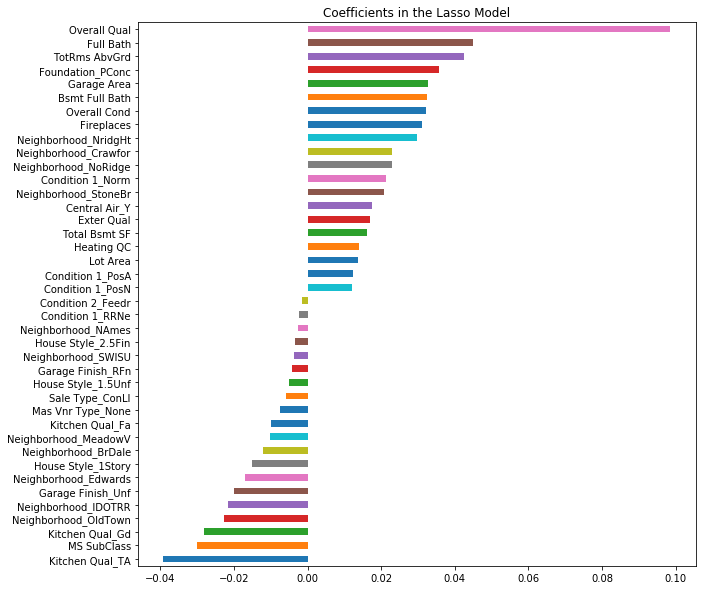

In [37]:
#visualize the coeficients
imp_coef = pd.concat([coef.sort_values().head(20),
coef.sort_values().tail(20)])
plt.figure(figsize= (10,10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

## Fine Tune Model

In [99]:
#instantiate Lasso Regression
elastic= ElasticNet()

In [100]:
# Setup the parameter for tuning
param_grid = {
    'alpha': np.arange(0.0015, 0.003, 0.0005),
    'l1_ratio': np.arange(0.1, 1.0, 0.1)
}

In [101]:
# GridSearch
gs_search = GridSearchCV(elastic, param_grid, cv=3)

In [102]:
# fit the gridSearch
gs_search.fit(X_train_sc, np.log(y_train))
print(gs_search.best_score_)
gs_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.8391920687311432


{'alpha': 0.0025, 'l1_ratio': 0.9}

In [103]:
# check the R_squared score for train
gs_search.best_estimator_.score(X_train_sc, np.log(y_train))

0.8728761786524075

In [104]:
# check the R_squared score for test
gs_search.best_estimator_.score(X_test_sc, np.log(y_test))

0.883450265267774

In [105]:
# Check the Root mean squared error
pred = gs_search.best_estimator_.predict(X_test_sc)
np.sqrt(mean_squared_error(np.log(y_test), pred))

0.14573276501025145